In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = keras.datasets.mnist

In [6]:
(X_train_images, y_train_labels), (X_test_images, y_test_labels) =  data.load_data()

In [7]:
print(X_train_images.shape, y_train_labels.shape, X_test_images.shape, y_test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
print(X_train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

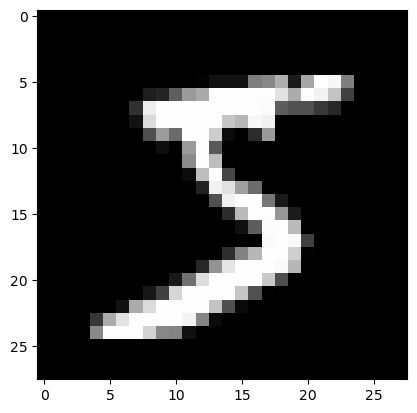

In [9]:
plt.imshow(X_train_images[0], cmap = 'gray')

In [10]:
print(y_train_labels)

[5 0 4 ... 5 6 8]


In [11]:
X_train = X_train_images.reshape(X_train_images.shape[0],28,28,1)
X_test = X_test_images.reshape(X_test_images.shape[0],28,28,1)

In [12]:
print(X_train.shape)

(60000, 28, 28, 1)


In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
y_train = keras.utils.to_categorical(y_train_labels)
y_test = keras.utils.to_categorical(y_test_labels)

In [15]:
print(X_train[0][0])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [16]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [17]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
print(np.argmax(y_train[0]))

5


In [19]:
print(np.amax(y_train[0]))

1.0


In [20]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = 'softmax'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, batch_size = 128, epochs = 1, validation_data = (X_test,y_test),  steps_per_epoch=None)

469/469 [==============================] - 69s 142ms/step - loss: 0.2316 - accuracy: 0.9295 - val_loss: 0.0518 - val_accuracy: 0.9816


In [24]:
prediction = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [25]:
print(prediction[0])

[7.9693291e-07 1.8803823e-09 2.8649133e-08 2.6335709e-07 3.4407541e-09
 4.0276245e-09 1.0212849e-11 9.9999660e-01 6.3825807e-09 2.2896982e-06]


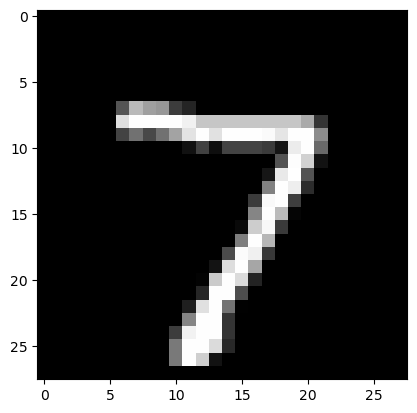

In [26]:
plt.imshow(X_test_images[0], cmap = 'gray')

In [27]:
print(np.argmax(prediction[0]))

7


In [28]:
print(np.amax(prediction[0]))

0.9999966


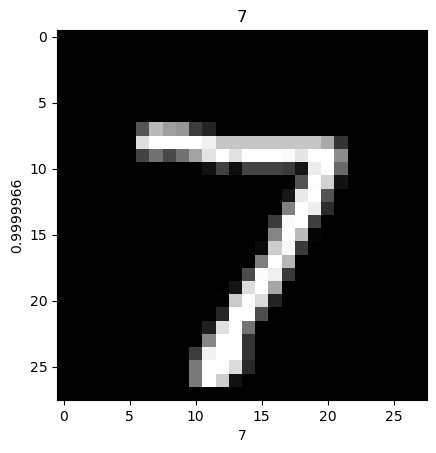

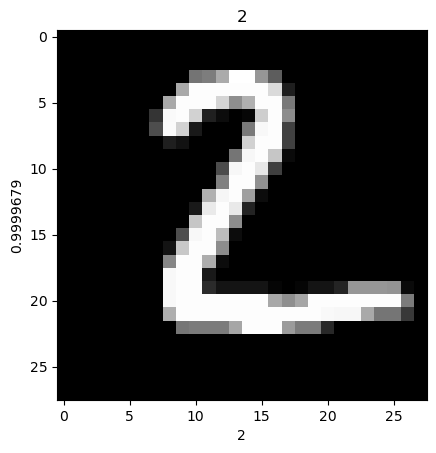

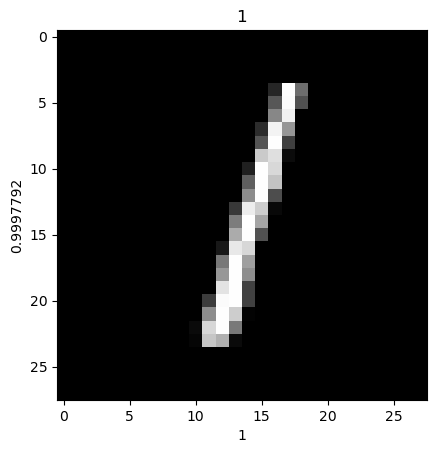

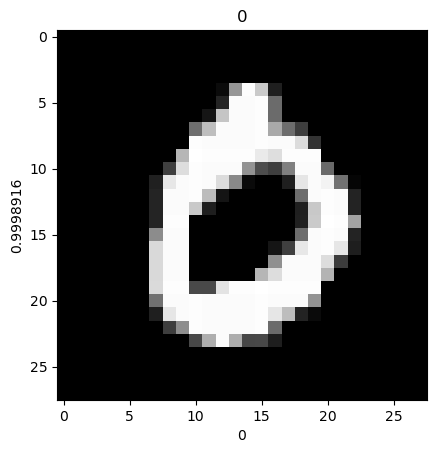

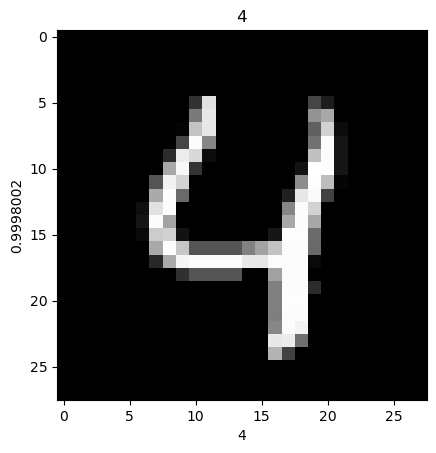

In [29]:
for i in range(0,5):
    plt.imshow(X_test_images[i], cmap = 'gray')
    plt.xlabel(np.argmax(prediction[i]))
    plt.ylabel(np.amax(prediction[i]))
    plt.title(y_test_labels[i])
    plt.show()

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0518 - accuracy: 0.9816


[0.05175849050283432, 0.9815999865531921]

In [31]:
model.save('mnist10.h5')

In [32]:
from tkinter import *

In [33]:
from PIL import Image, ImageDraw

In [34]:
from keras.models import load_model

In [35]:
import numpy as np

In [36]:
model = load_model('mnist10.h5')

In [37]:
def predict():
    global img
    img = img.resize(size = (28,28))
    img_array = np.array(img)
    img_array = img_array.reshape(1,28,28,1)
    img_array = img_array / 255
    pred = model(img_array)
    number = np.argmax(pred[0])
    percent = np.amax(pred[0])
    label1.config(text = str(number))
    label2.config(text = str(percent))
    
def clear():
    global img, img_draw
    canvas1.delete('all')
    label1.config(text = '#')
    label2.config(text = '%')
    img = Image.new(mode = 'L', size = (300,300), color = 0)
    img_draw = ImageDraw.Draw(img)       

def draw_lines(event):
    x = event.x
    y = event.y
    x1 = x - 8
    y1 = y - 8
    x2 = x + 8
    y2 = y + 8
    canvas1.create_oval((x1,y1,x2,y2), fill = 'black')
    img_draw.ellipse((x1,y1,x2,y2), fill = 'white')
    
def exit():
    window.destroy()
    
count = 0

def save():
    global img, count
    img = img.resize(size = (28,28))
    img.save(str(count)+'.jpg')
    count = count + 1

window = Tk()

window.geometry('550x350')
window.title('Hand Written Digit Recognition')
window.configure(bg = 'white')
window.resizable(0,0)

canvas1 = Canvas(window, bg = 'white', height = 300, width = 300)
canvas1.grid(row=0,column=0)

button1 = Button(window, bg = 'white', fg = 'black', command = clear, width = 10, text = 'Clear')
button1.grid(row = 1, column = 0, sticky = W)

button2 = Button(window, bg = 'white', fg = 'black', command = predict, width = 10, text = 'Predict')
button2.grid(row = 1, column = 1, sticky = E)

button3 = Button(window, bg = 'white', fg = 'black', command = save, width = 10, text = 'Save')
button3.grid(row = 1, column = 2, sticky = E)

button4 = Button(window, bg = 'white', fg = 'black', command = exit, width = 10, text = 'Exit')
button4.grid(row = 1, column = 3, sticky = E)

label1 = Label(window, bg = 'white', fg = 'black', text = '#', font = 'Arial 12 bold')
label1.grid(row = 0, column = 1)

label2 = Label(window, bg = 'white', fg = 'black', text = '%', font = 'Arial 12 bold')
label2.grid(row = 0, column = 2)

canvas1.bind('<B1-Motion>', draw_lines)

img = Image.new(mode = 'L', size = (300,300), color = 0)
img_draw = ImageDraw.Draw(img)   

window.mainloop()